Candidate Name: Yagna Suthar
Email: yagna.suthar@gmail.com
Mobile Number: +91 9265679968

# Analyzing Final Merged Dataset

## Importing Libraries for analysis and visualisations

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing Merged dataset from csv_files Directory/Folder

In [24]:
final_df = pd.read_csv('csv_files/final_df.csv')

print(final_df.info(),'\n\n\n\n')
print(final_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173532 entries, 0 to 173531
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Account          173532 non-null  object 
 1   Coin             173532 non-null  object 
 2   Execution Price  173532 non-null  float64
 3   Size Tokens      173532 non-null  float64
 4   Size USD         173532 non-null  float64
 5   Side             173532 non-null  object 
 6   Timestamp IST    173532 non-null  object 
 7   Closed PnL       173532 non-null  float64
 8   Fee              173532 non-null  float64
 9   date             173532 non-null  object 
 10  sentiment        173532 non-null  object 
dtypes: float64(5), object(6)
memory usage: 14.6+ MB
None 




                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   

## just Checking our dataset contains any missing or null values and sentiment are distributed in mainly 3 categories or not

In [25]:
print(final_df['sentiment'].value_counts())
print(final_df.isnull().sum(),'\n\n\n')

sentiment
Greed    90295
Fear     83237
Name: count, dtype: int64
Account            0
Coin               0
Execution Price    0
Size Tokens        0
Size USD           0
Side               0
Timestamp IST      0
Closed PnL         0
Fee                0
date               0
sentiment          0
dtype: int64 





## Basic Statistics by Sentiment

In [26]:
summary = final_df.groupby('sentiment').agg({
    'Closed PnL': ['mean', 'median', 'std'],
    'Size USD': ['mean', 'median', 'std'],
    'Fee': ['mean', 'median']
})
print(summary)


          Closed PnL                        Size USD                       \
                mean median         std         mean median           std   
sentiment                                                                   
Fear       49.212077    0.0  990.875398  7182.011019  749.4  46166.174380   
Greed      53.882281    0.0  976.964281  4574.424490  552.2  23984.715663   

                Fee            
               mean    median  
sentiment                      
Fear       1.397763  0.116451  
Greed      0.998166  0.072687  


# Visualizations of dataset

In [27]:
import os

if not os.path.exists('outputs'):
    os.makedirs('outputs')

## Profitability by Sentiment

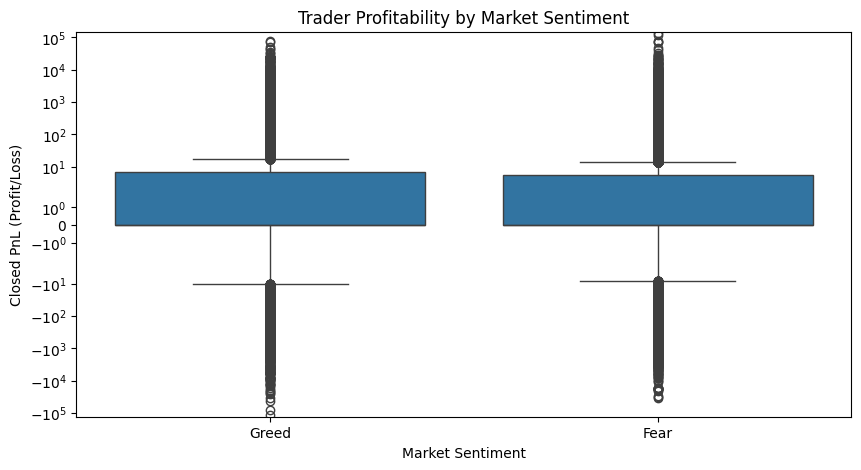

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x='sentiment', y='Closed PnL', data=final_df)
plt.title('Trader Profitability by Market Sentiment')
plt.ylabel('Closed PnL (Profit/Loss)')
plt.xlabel('Market Sentiment')
plt.yscale('symlog')  # Handle negative and positive extremes

plt.savefig('outputs/Trader_Profitability_by_Market_Sentiment.png',dpi=300, bbox_inches='tight')
plt.show()

## Trade Volume (Size USD) by Sentiment

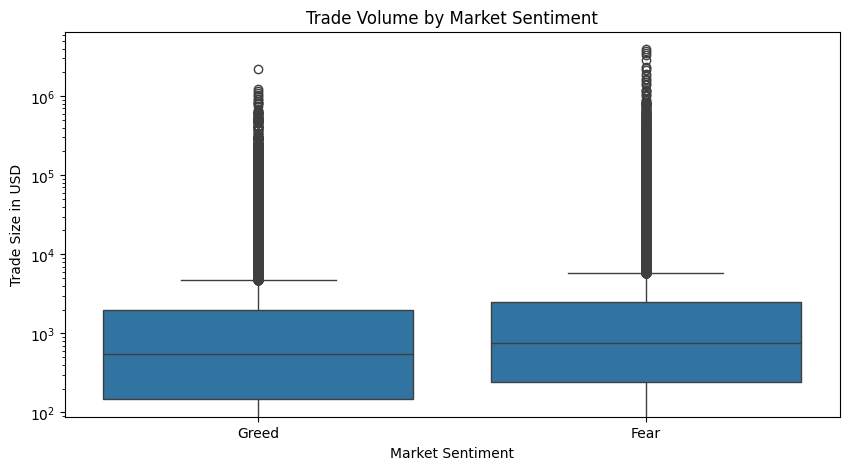

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='sentiment', y='Size USD', data=final_df)
plt.title('Trade Volume by Market Sentiment')
plt.ylabel('Trade Size in USD')
plt.xlabel('Market Sentiment')
plt.yscale('log')  # Log scale makes large trade differences visible

plt.savefig('outputs/Trade_Volume_by_Market_Sentiment.png',dpi=300, bbox_inches='tight')
plt.show()


## Trading Fee vs Sentiment

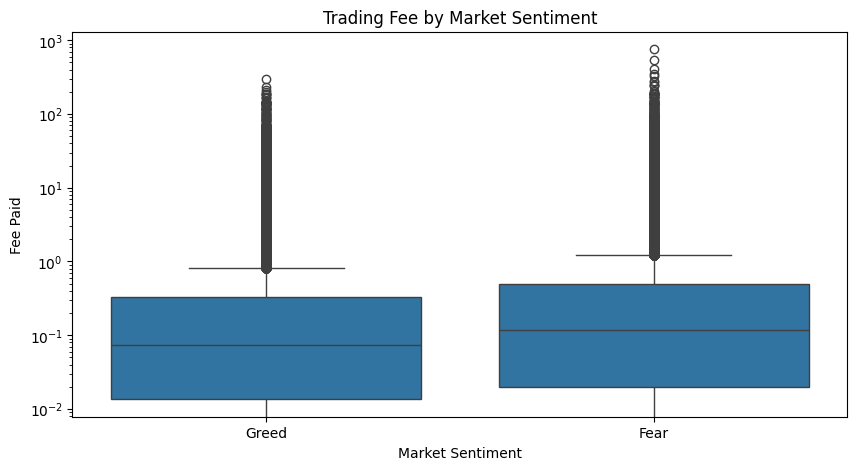

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x='sentiment', y='Fee', data=final_df)
plt.title('Trading Fee by Market Sentiment')
plt.ylabel('Fee Paid')
plt.xlabel('Market Sentiment')
plt.yscale('log')  # Fees vary greatly with trade size

plt.savefig('outputs/Trading_Fee_by_Market_Sentiment.png',dpi=300, bbox_inches='tight')
plt.show()


##Correlation Between Trade Features

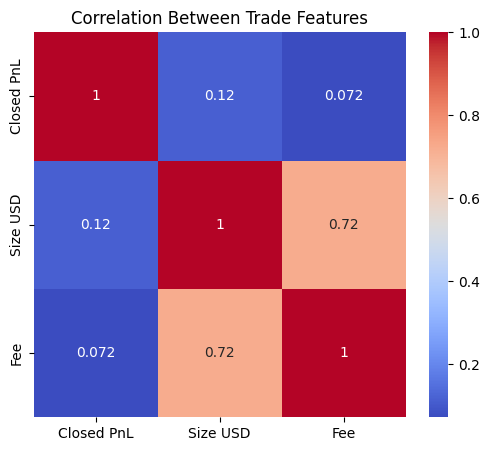

In [31]:
numerical_cols = ['Closed PnL', 'Size USD', 'Fee']  # Add 'leverage' if available
corr_matrix = final_df[numerical_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Trade Features')

plt.savefig('outputs/Correlation_Between_Trade_Features.png',dpi=300, bbox_inches='tight')
plt.show()



## Sampling dataset scatterplot visualisations

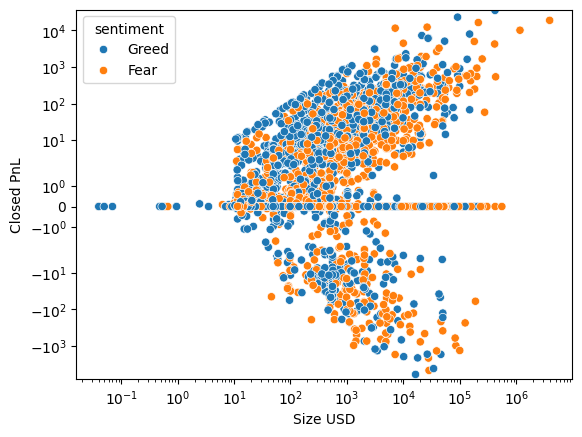

In [32]:
sample_df = final_df.sample(5000, random_state=42)
sns.scatterplot(x='Size USD', y='Closed PnL', hue='sentiment', data=sample_df)
plt.yscale('symlog')
plt.xscale('log')

plt.savefig('outputs/scatterplot.png',dpi=300, bbox_inches='tight')
plt.show()


## Proportion of Profitable Trades by Market Sentiment

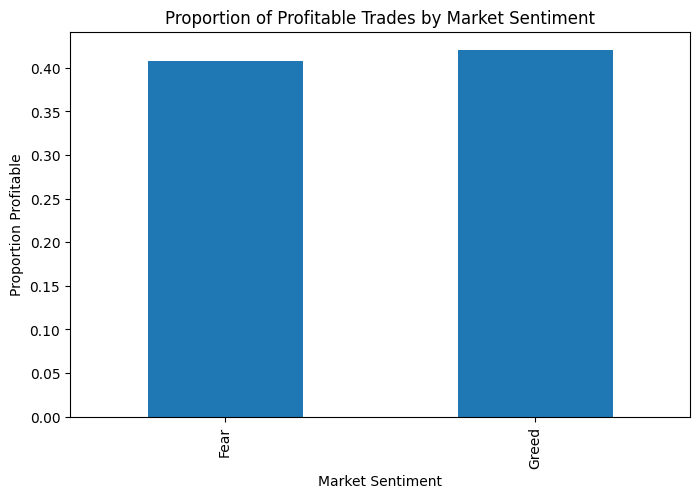

In [33]:
final_df['profitable'] = final_df['Closed PnL'] > 0
profit_rate = final_df.groupby('sentiment')['profitable'].mean()

profit_rate.plot(kind='bar', figsize=(8,5))
plt.title('Proportion of Profitable Trades by Market Sentiment')
plt.ylabel('Proportion Profitable')
plt.xlabel('Market Sentiment')

plt.savefig('outputs/Proportion_of_Profitable.png', dpi=300, bbox_inches='tight')
plt.show()
